In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
df['mean']=df.mean(axis=1)
df['std']=df.std(axis=1)

#this is approximate method for interval
df['sem']=df.sem(axis=1)
df['i_min']=df['mean']-df['sem']*4
df['i_max']=df['mean']+df['sem']*4

df['yerr']=df['sem']*4 
print(df[['mean', 'i_min', 'i_max', 'yerr', 'std', 'sem']])

              mean         i_min         i_max          yerr            std  \
1992  33312.107476  20034.653462  46589.561489  13277.454014  200603.415985   
1993  41861.859541  35350.328798  48373.390284   6511.530743   98384.876053   
1994  39493.304941  30204.060270  48782.549613   9289.244671  140350.695166   
1995  47743.550969  43125.912861  52361.189078   4617.638108   69771.625748   

              sem  
1992  3319.363503  
1993  1627.882686  
1994  2322.311168  
1995  1154.409527  


<IPython.core.display.Javascript object>


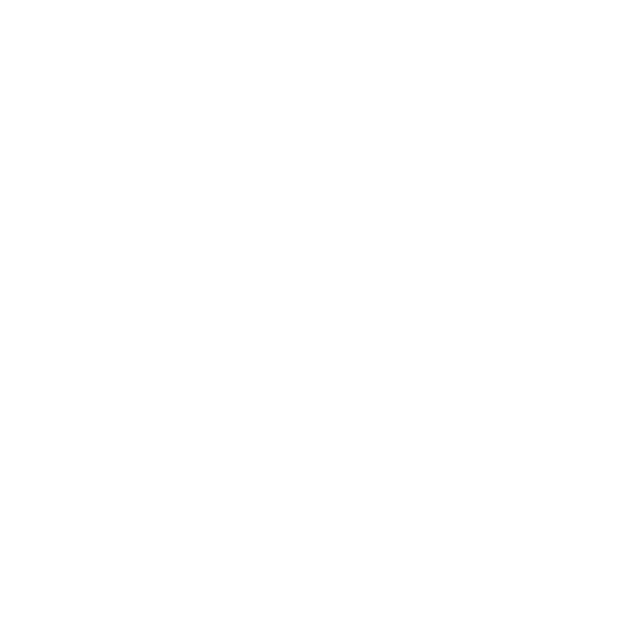

9

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cl_max_color='red'
cl_min_color='blue'
cl_neitral_color='grey'

class Cursor(object):
    _df=None
    _bl=None
    def __init__(self, ax, data_F, bars):
        self._df=data_F
        self._bl=bars
        self.ax = ax
        self.lx = ax.axhline(color='b')

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_min_color)
                continue
            if row['i_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_max_color)
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(cl_neitral_color)
        plt.draw()
        
def plot_base(fix_x, fig_y, fig_title, c_alpha=0.5):
    ax=df['mean'].plot.bar(yerr=df['yerr'], 
        title =fig_title, figsize=(fix_x, fig_y), 
        legend=False, fontsize=10, alpha=c_alpha, width=0.95, 
        rot=0, position=0, style='-', color=cl_neitral_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    majors = [0.5,1.5,2.5, 3.5]
    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))

    plt.tight_layout()
    
    return (ax, ax.get_children()[1:5])

ax, barlist=plot_base(5, 5, "Easiest option")

cursor = Cursor(ax, df, barlist)
plt.connect('motion_notify_event', cursor.mouse_move)

<IPython.core.display.Javascript object>


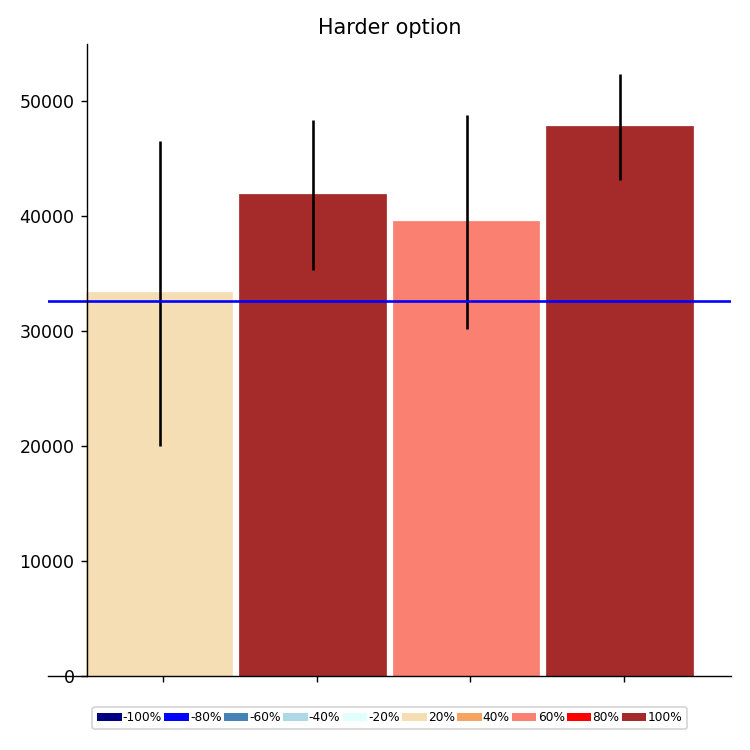

9

In [4]:
#import matplotlib.lines as mlines
%matplotlib notebook
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

from collections import OrderedDict


dct=OrderedDict( [('navy','-100%'), ('blue','-80%'), ('steelblue','-60%'), ('lightblue','-40%'), 
                ('lightcyan','-20%'), ('wheat','20%'), ('sandybrown','40%'), 
                ('salmon','60%'), ('red','80%'), ('brown','100%')] )

com_alpha=0.7

class CursorHard(Cursor):
    #_colors=list(dct.keys())
    _colors=list(reversed(dct.keys()))
    _num_bins=8
    def _get_color(self, d_series, val):
        s=d_series[['i_min', 'i_max']]
        s['val']=val
        s=pd.cut(s, bins=self._num_bins, labels=list(range(self._num_bins)), include_lowest=False, right=True)
        return self._colors[s['val']+1]

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[-1])
                continue
            if row['i_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[0])
                continue
            self._bl[self._df.index.get_loc(index)].set_color(self._get_color(row, y))
        plt.draw()

ax1, barlist1=plot_base(6, 6, 'Harder option', c_alpha=1) 

bars_leg=[]

for k, v in dct.items():
    p=Rectangle((0, 0), 1, 1, fc=k, label=v)
    bars_leg.append(p)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.04), 
           handles=bars_leg, ncol=len(bars_leg), columnspacing=0.2, handletextpad=0.1, fontsize=7)

plt.tight_layout()
plt.show()

hcursor = CursorHard(ax1, df, barlist1)
plt.connect('motion_notify_event', hcursor.mouse_move)